In [1]:
import pandas as pd 
df = pd.read_csv("./../data/snp_dld_2024_rents.csv")

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
df = df[:100]

In [3]:
df['req_to'] = pd.to_datetime(df['req_to'], errors='coerce')
df['meta_ts'] = pd.to_datetime(df['meta_ts'], errors='coerce')
df['registration_date'] = pd.to_datetime(df['registration_date'], errors='coerce')

# Fill missing datetime values with a default value (optional)
df['req_to'].fillna(pd.to_datetime('2024-01-01'), inplace=True)
df['meta_ts'].fillna(pd.to_datetime('2024-01-01'), inplace=True)
df['registration_date'].fillna(pd.to_datetime('2024-01-01'), inplace=True)

# Extract date components for feature engineering
df['req_to_year'] = df['req_to'].dt.year
df['req_to_month'] = df['req_to'].dt.month
df['req_to_day'] = df['req_to'].dt.day
df['req_to_hour'] = df['req_to'].dt.hour
df['req_to_weekday'] = df['req_to'].dt.weekday

df['meta_ts_year'] = df['meta_ts'].dt.year
df['meta_ts_month'] = df['meta_ts'].dt.month
df['meta_ts_day'] = df['meta_ts'].dt.day
df['meta_ts_hour'] = df['meta_ts'].dt.hour
df['meta_ts_weekday'] = df['meta_ts'].dt.weekday

df['registration_date_year'] = df['registration_date'].dt.year
df['registration_date_month'] = df['registration_date'].dt.month
df['registration_date_day'] = df['registration_date'].dt.day
df['registration_date_hour'] = df['registration_date'].dt.hour
df['registration_date_weekday'] = df['registration_date'].dt.weekday

# Calculate time differences between 'req_to' and 'registration_date' in days
df['contract_duration_days'] = (df['req_to'] - df['registration_date']).dt.days

# Drop original datetime columns to avoid redundancy
df.drop(columns=['req_to', 'meta_ts', 'registration_date'], inplace=True)


In [4]:
df.head()

,ejari_contract_number,contract_start_date,contract_end_date,version_number,version_text,contract_amount,annual_amount,is_freehold,is_freehold_text,property_size_sqm,...,meta_ts_month,meta_ts_day,meta_ts_hour,meta_ts_weekday,registration_date_year,registration_date_month,registration_date_day,registration_date_hour,registration_date_weekday,contract_duration_days
0,120130625001365,2024-01-01,2024-12-31,12,Renewed,58000.0,58000.0,f,Non Free Hold,120.76,...,9,26,11,3,2024,1,24,11,2,6
1,120130626005726,2024-03-18,2025-03-17,12,Renewed,88000.0,88000.0,t,Free Hold,159.03,...,9,26,11,3,2024,1,9,16,1,21
2,120130626007829,2024-01-01,2024-12-31,12,Renewed,94000.0,94000.0,f,Non Free Hold,60.94,...,9,26,11,3,2024,1,16,11,1,14
3,120130627008661,2024-01-01,2024-12-31,12,Renewed,66000.0,66000.0,f,Non Free Hold,108.88,...,9,26,11,3,2024,1,15,18,0,15
4,120130627009439,2024-01-01,2024-12-31,12,Renewed,31200.0,31200.0,f,Non Free Hold,57.60,...,9,26,11,3,2024,1,22,13,0,8


In [5]:
non_numeric_columns = df.select_dtypes(include=['object', 'string']).columns
print(non_numeric_columns)
print(df[non_numeric_columns].head())

Index(['contract_start_date', 'contract_end_date', 'version_text',
       'is_freehold', 'is_freehold_text', 'property_type_en',
       'property_type_ar', 'property_subtype_en', 'property_subtype_ar',
       'property_usage_en', 'property_usage_ar', 'project_name_en',
       'project_name_ar', 'area_en', 'area_ar', 'nearest_landmark_en',
       'nearest_landmark_ar', 'nearest_metro_en', 'nearest_metro_ar',
       'nearest_mall_en', 'nearest_mall_ar', 'master_project_en',
       'master_project_ar', 'req_from'],
      dtype='object')
  contract_start_date contract_end_date version_text is_freehold  \
0          2024-01-01        2024-12-31      Renewed           f   
1          2024-03-18        2025-03-17      Renewed           t   
2          2024-01-01        2024-12-31      Renewed           f   
3          2024-01-01        2024-12-31      Renewed           f   
4          2024-01-01        2024-12-31      Renewed           f   

  is_freehold_text property_type_en property_type_a

In [6]:
for col in non_numeric_columns:
    print(f"Unique values in {col}:")
    print(df[col].unique()[:5])  # Show a sample of unique values


Unique values in contract_start_date:
['2024-01-01' '2024-03-18' '2024-01-08' '2023-11-08' '2023-12-21']
Unique values in contract_end_date:
['2024-12-31' '2025-03-17' '2024-04-07' '2024-02-07' '2024-12-20']
Unique values in version_text:
['Renewed']
Unique values in is_freehold:
['f' 't']
Unique values in is_freehold_text:
['Non Free Hold' 'Free Hold']
Unique values in property_type_en:
['Unit' 'Villa' 'Land']
Unique values in property_type_ar:
['وحدة' 'فيلا' 'أرض']
Unique values in property_subtype_en:
['Flat' 'Shop' 'Warehouse complex' 'Complex Villas' nan]
Unique values in property_subtype_ar:
['شقه' 'محل' 'مجمع مخازن' 'مجمع فلل' nan]
Unique values in property_usage_en:
['Residential' 'Commercial' 'Industrial' nan]
Unique values in property_usage_ar:
['سكني' 'تجاري' 'صناعي' nan]
Unique values in project_name_en:
[nan 'REMRAAM']
Unique values in project_name_ar:
[nan 'رمرام']
Unique values in area_en:
['Al Nahda Second' 'Mirdif' 'Al Muteena' 'Al Barsha First'
 'Al Qusais First']
Uni

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
def feature_importance(df, target_column):
    
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    model = RandomForestClassifier()
    model.fit(X, y)
    
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    })
    
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    
    print("Feature importance using Random Forest:")
    print(feature_importance)
    
    top_features = feature_importance.head(10)['Feature'].tolist()
    print(f"Top 10 important features: {top_features}")
    return feature_importance
target = 'annual_amount'
print(feature_importance(df, target))

ValueError: could not convert string to float: '2024-01-01'

In [3]:
# 1. Structure of the Dataset
print("### Dataset Overview ###")
print("Shape of dataset:", df.shape)
print("Column Information:")
print(df.info())

### Dataset Overview ###
Shape of dataset: (747408, 43)
Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747408 entries, 0 to 747407
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ejari_contract_number       747408 non-null  int64  
 1   registration_date           747408 non-null  object 
 2   contract_start_date         747408 non-null  object 
 3   contract_end_date           747408 non-null  object 
 4   version_number              747408 non-null  int64  
 5   version_text                747408 non-null  object 
 6   contract_amount             747408 non-null  float64
 7   annual_amount               747394 non-null  float64
 8   is_freehold                 747408 non-null  object 
 9   is_freehold_text            747408 non-null  object 
 10  property_size_sqm           747408 non-null  float64
 11  parcel_id                   516983 non-null  float64
 

In [41]:
df.shape[0]/2

373704.0

In [42]:
# 2. Checking Missing Values
print("\n### Missing Values ###")
missing_values = df.isnull().sum()
print(missing_values[missing_values > df.shape[0]/2])


### Missing Values ###
rooms                721746
parking              731686
project_name_en      576935
project_name_ar      576935
master_project_en    747311
master_project_ar    747311
dtype: int64


In [36]:
missing_percentage = df.isnull().mean()

In [37]:
columns_to_drop = missing_percentage[missing_percentage > 50].index.tolist()


In [38]:
columns_to_drop

[]

In [5]:
print("\n### Descriptive Statistics (Numerical) ###")
print(df.describe())


### Descriptive Statistics (Numerical) ###
       ejari_contract_number  version_number  contract_amount  annual_amount  \
count           7.474080e+05   747408.000000     7.474080e+05   7.473940e+05   
mean            1.377502e+14        2.521462     5.653234e+05   3.497168e+05   
std             4.283509e+13        2.271321     4.484052e+06   1.742126e+06   
min             6.014300e+04        1.000000    -7.300000e+04  -7.300000e+04   
25%             1.202204e+14        1.000000     3.800000e+04   3.900000e+04   
50%             1.202402e+14        2.000000     6.300000e+04   6.380000e+04   
75%             1.202408e+14        3.000000     1.300000e+05   1.300000e+05   
max             2.202409e+14       27.000000     4.410800e+08   7.218145e+07   

       property_size_sqm     parcel_id  property_id  land_property_id  \
count       7.474080e+05  5.169830e+05     747408.0          747408.0   
mean        1.821756e+03  3.400093e+06          0.0               0.0   
std         6.84

In [6]:
print("\n### Categorical Column Analysis ###")
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


### Categorical Column Analysis ###

Value counts for registration_date:
2024-03-25 12:58:39    636
2024-07-25 09:17:09    564
2024-07-25 09:13:05    564
2024-09-19 11:05:38    484
2024-07-24 08:58:13    412
                      ... 
2024-03-12 13:25:28      1
2024-03-08 14:54:21      1
2024-03-15 15:15:09      1
2024-03-26 11:30:37      1
2024-09-17 17:03:04      1
Name: registration_date, Length: 583795, dtype: int64

Value counts for contract_start_date:
2024-01-01    33450
2024-04-01    21197
2024-02-01    20581
2024-08-01    19605
2024-07-01    19596
              ...  
2020-09-23        1
2022-05-13        1
2021-05-13        1
2019-04-05        1
2020-10-26        1
Name: contract_start_date, Length: 1614, dtype: int64

Value counts for contract_end_date:
2024-12-31    33651
2025-02-28    19802
2025-03-31    19718
2025-01-31    19170
2025-06-30    18281
              ...  
2029-06-17        1
2020-07-09        1
2023-06-13        1
2020-11-24        1
2021-07-13        1
Name:

In [7]:
print("\n### Correlation Analysis ###")
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()
print(correlation_matrix)


### Correlation Analysis ###
                            ejari_contract_number  version_number  \
ejari_contract_number                    1.000000       -0.263943   
version_number                          -0.263943        1.000000   
contract_amount                         -0.027316       -0.001319   
annual_amount                           -0.074445        0.008333   
property_size_sqm                        0.004342       -0.000510   
parcel_id                                0.206996       -0.102538   
property_id                                   NaN             NaN   
land_property_id                              NaN             NaN   
property_usage_id                             NaN             NaN   
total_properties                        -0.042889       -0.043420   
rooms                                   -0.003957       -0.031727   
parking                                 -0.025577       -0.004392   
area_id                                       NaN             NaN   
ejar

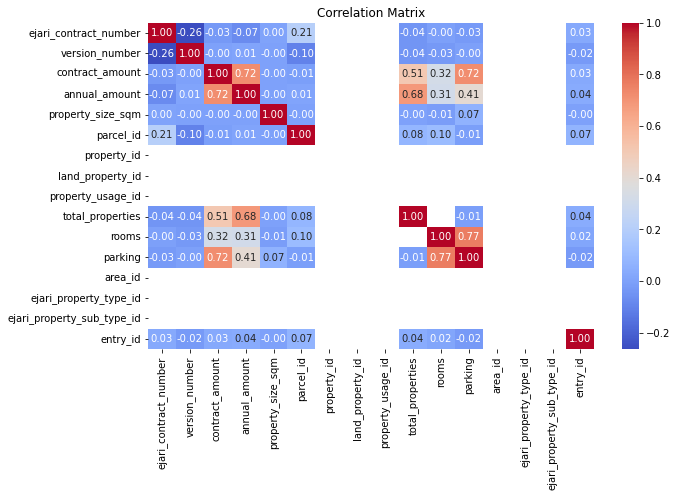

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [9]:
# Drop all columns ending with '_ar'
columns_to_drop = [col for col in df.columns if col.endswith('_ar')]
data = df.drop(columns=columns_to_drop)

# Verify the columns are removed
print("Remaining columns after dropping '_ar' columns:")
print(data.columns)


Remaining columns after dropping '_ar' columns:
Index(['ejari_contract_number', 'registration_date', 'contract_start_date',
       'contract_end_date', 'version_number', 'version_text',
       'contract_amount', 'annual_amount', 'is_freehold', 'is_freehold_text',
       'property_size_sqm', 'parcel_id', 'property_id', 'land_property_id',
       'property_type_en', 'property_subtype_en', 'property_usage_en',
       'property_usage_id', 'total_properties', 'rooms', 'parking',
       'project_name_en', 'area_en', 'area_id', 'nearest_landmark_en',
       'nearest_metro_en', 'nearest_mall_en', 'master_project_en',
       'ejari_property_type_id', 'ejari_property_sub_type_id', 'req_from',
       'req_to', 'entry_id', 'meta_ts'],
      dtype='object')


In [11]:
# List of columns to convert to datetime
columns_to_convert = ['registration_date', 'contract_start_date', 'contract_end_date']

# Convert each column to datetime format
for col in columns_to_convert:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# Check the result
print("DataFrame with date columns converted:")
print(data.info())


DataFrame with date columns converted:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747408 entries, 0 to 747407
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ejari_contract_number       747408 non-null  int64         
 1   registration_date           747408 non-null  datetime64[ns]
 2   contract_start_date         747408 non-null  datetime64[ns]
 3   contract_end_date           747408 non-null  datetime64[ns]
 4   version_number              747408 non-null  int64         
 5   version_text                747408 non-null  object        
 6   contract_amount             747408 non-null  float64       
 7   annual_amount               747394 non-null  float64       
 8   is_freehold                 747408 non-null  object        
 9   is_freehold_text            747408 non-null  object        
 10  property_size_sqm           747408 non-null  float64       
 11  

In [14]:
columns_to_drop = [col for col in df.columns if col.endswith('_ar')]
df.drop(columns=columns_to_drop, inplace=True)

In [15]:
def convert_date_column(df, columns_to_convert):
    for col in columns_to_convert:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
        else:
            print(f"Warning: Column '{col}' not found in DataFrame.")


In [ ]:
# convert_date_column(df,columns_to_convert = ['registration_date', 'contract_start_date', 'contract_end_date','req_from','req_to','meta_ts'])

In [29]:
dff = pd.read_csv("./../data/precessed_data.csv")

In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import json

def handle_missing_data(df):
    # Identify numeric columns that have missing values
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numeric_columns = [col for col in numeric_columns if df[col].isnull().any() and not col.endswith('_id')]

    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    categorical_columns = [col for col in categorical_columns if df[col].isnull().any() and not col.endswith('_id')]

    numeric_imputer = SimpleImputer(strategy='median')
    if numeric_columns:
        df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    if categorical_columns:
        df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns]).astype('object')
    return df

In [33]:
df = handle_missing_data(df)

In [2]:
import pandas as pd
dff = pd.read_csv("./../data/pro.csv")

In [4]:
dff.head()

,Unnamed: 0,ejari_contract_number,registration_date,version_number,version_text,contract_amount,annual_amount,is_freehold,is_freehold_text,parcel_id,...,nearest_metro_en,nearest_mall_en,ejari_property_type_id,ejari_property_sub_type_id,req_from,req_to,entry_id,meta_ts,room_density,total_agreement_period
0,0,-0.739846,2024-01-24 11:14:33.000,0.78196,0.031639,-0.427228,-0.483030,-0.276453,0.276453,-0.158991,...,-0.911867,-1.107332,0.0,0.0,2024-01-01 00:00:00.000,2024-01-31 00:00:00.000,0.0,2024-09-26 11:18:46.859,-7.532863,365
1,1,-0.739700,2024-01-09 16:48:47.000,0.78196,0.031639,-0.403086,-0.452790,3.617251,-3.617251,-0.082588,...,1.532365,-1.107332,0.0,0.0,2024-01-01 00:00:00.000,2024-01-31 00:00:00.000,0.0,2024-09-26 11:18:46.859,-7.112750,364
2,2,-0.739699,2024-01-16 11:39:26.000,0.78196,0.031639,-0.398258,-0.446741,-0.276453,0.276453,-1.029848,...,1.700933,-0.092362,0.0,0.0,2024-01-01 00:00:00.000,2024-01-31 00:00:00.000,0.0,2024-09-26 11:18:46.859,-8.189543,365
3,3,-0.739553,2024-01-15 18:28:05.000,0.78196,0.031639,-0.420790,-0.474966,-0.276453,0.276453,0.815117,...,1.785217,1.937578,0.0,0.0,2024-01-01 00:00:00.000,2024-01-31 00:00:00.000,0.0,2024-09-26 11:18:46.859,-7.663277,365
4,4,-0.739553,2024-01-22 13:34:29.000,0.78196,0.031639,-0.448794,-0.510045,-0.276453,0.276453,-0.225461,...,-1.249003,-1.107332,0.0,0.0,2024-01-01 00:00:00.000,2024-01-31 00:00:00.000,0.0,2024-09-26 11:18:46.859,-8.226209,365


In [6]:
dff['req_to'] = pd.to_datetime(dff['req_to'], errors='coerce')
dff['req_from'] = pd.to_datetime(dff['req_from'], errors='coerce')

In [7]:

dff['total_period'] = (dff['req_to'] - dff['req_from']).dt.days

<bound method Series.unique of 0      30
1      30
2      30
3      30
4      30
       ..
995    30
996    30
997    30
998    30
999    30
Name: total_period, Length: 1000, dtype: int64>